# Image Classification with Neural Networks
This is the program to classify images - here the images of animals and vehicals using tensorflow.

Steps:

1. Install dependencies
2. import the dataset
3. Data pipeline
4. model creation
5. Evaluate the model

### Installing Dependencies

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

tf.__version__

'2.12.0'

In [2]:
# import the data as train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
len(X_train), len(y_train)

(50000, 50000)

In [3]:
X_train[0].shape

(32, 32, 3)

In [4]:
# shoe the first training example
print(f"Training data example:\n{X_train[0]}\n")
print(f"Training label example:\n{y_train[0]}\n")

Training data example:
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]

Training label example:
[6]



### Visualize the data

In [5]:
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
# import matplotlib.pyplot as plt
# index_choice = 7
# plt.imshow(X_train[index_choice], cmap=plt.cm.binary)
# plt.title(class_names[y_train[index_choice][0]])

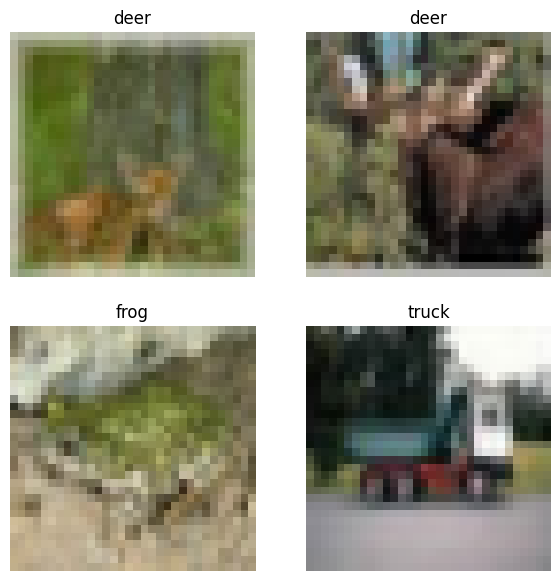

In [7]:
# create a function to visualise some random samples of data
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2, i+1)
  random_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[random_index], cmap="binary")
  plt.title(class_names[y_train[random_index][0]])
  plt.axis(False)

In [8]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [9]:
# y_train = tf.cast(tf.squeeze(y_train), dtype=tf.float32)
# y_test = tf.cast(tf.squeeze(y_test), dtype=tf.float32)

# y_train[:10]

In [10]:
y_train[0].shape

(1,)

#### Data Preprcessing

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer

max_intensity = 255.0

# we can get out training and testing data between 0 and 1 by dividing by max
X_train_norm = X_train / max_intensity
X_test_norm = X_test / max_intensity

# checking min and max of the trainingg data
X_train_norm.min(), X_train_norm.max()

(0.0, 1.0)

In [12]:
y_train = tf.one_hot(tf.squeeze(y_train), depth=len(class_names))
y_test =  tf.one_hot(tf.squeeze(y_test), depth=len(class_names))
y_train[:10]

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

### Building the model

In [13]:
X_train[0].shape

(32, 32, 3)

In [14]:
y_train[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)>

In [15]:
# set random seed
tf.random.set_seed(42)

# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3), strides=1, activation="relu", input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3), strides=1, activation="relu"),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(len(class_names), activation="softmax"),
])


In [16]:
# compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics="accuracy")

In [17]:
# Architecture of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [18]:
# plotting the model
# from tensorflow.keras.utils import plot_model

# plot_model(model, show_shapes=True)

In [19]:
# build lr schedular for callback
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 * 10 ** (epoch/20))

In [20]:
# tensor boards logging
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir="logs")

In [21]:
# fit the model on the training data
history = model.fit(X_train_norm,
                    y_train,
                    epochs=10,
                    callbacks=[lr_schedular, tensorboard_callbacks],
                    validation_data=[X_test_norm, y_test],
                    batch_size=64)

Epoch 1/10
782/782 [==============================] - 12s 6ms/step - loss: 1.4675 - accuracy: 0.4750 - val_loss: 1.2189 - val_accuracy: 0.5718 - lr: 0.0010
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 1.1141 - accuracy: 0.6101 - val_loss: 1.0354 - val_accuracy: 0.6408 - lr: 0.0011
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.9792 - accuracy: 0.6583 - val_loss: 0.9754 - val_accuracy: 0.6634 - lr: 0.0013
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.8893 - accuracy: 0.6910 - val_loss: 0.9769 - val_accuracy: 0.6626 - lr: 0.0014
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.8128 - accuracy: 0.7165 - val_loss: 0.9231 - val_accuracy: 0.6897 - lr: 0.0016
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.7456 - accuracy: 0.7412 - val_loss: 1.0346 - val_accuracy: 0.6611 - lr: 0.0018
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - l

In [22]:
# evaluate the model
model.evaluate(X_test_norm, tf.cast(y_test,dtype=tf.int16))

313/313 [==============================] - 1s 4ms/step - loss: 1.0084 - accuracy: 0.6894


[1.008409857749939, 0.6894000172615051]

<Axes: xlabel='epochs'>

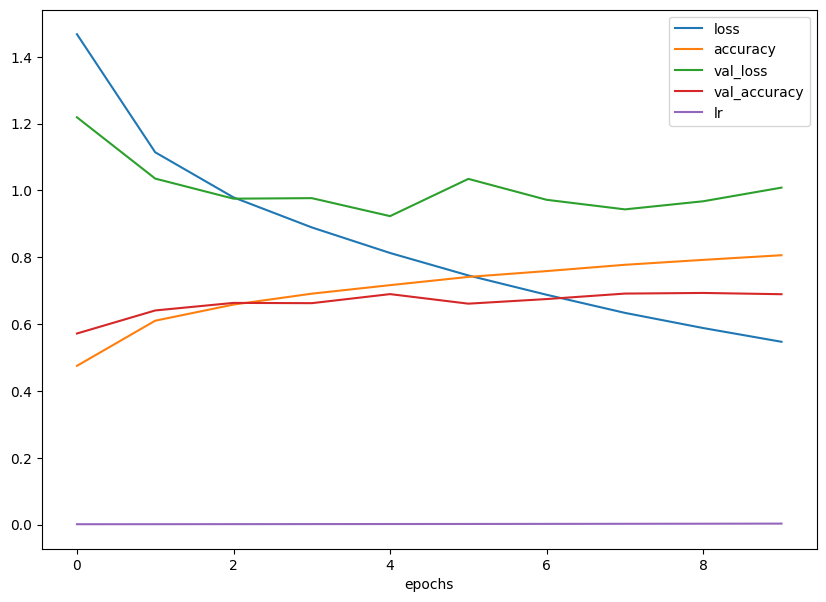

In [23]:
# plot loss decay curve
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel="epochs")

In [24]:
history.history['loss']

[1.4675341844558716,
 1.1141457557678223,
 0.9791869521141052,
 0.8893333673477173,
 0.8127752542495728,
 0.7455614805221558,
 0.6877375841140747,
 0.6335462927818298,
 0.588135838508606,
 0.5470226407051086]

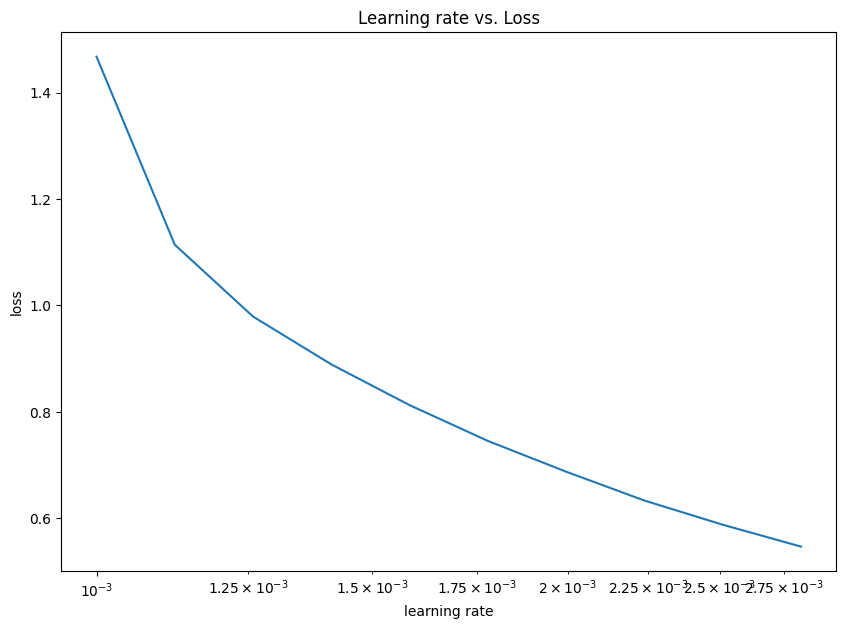

In [25]:
# plot learning_rate vs the loss
lrs = 1e-3 * (10 ** (tf.range(10)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history['loss'])
plt.xlabel("learning rate")
plt.ylabel('loss')
plt.title("Learning rate vs. Loss");

Adding Max pooling filter size


In [26]:
# set random seed
tf.random.set_seed(42)

# create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3), strides=1, activation="relu", input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3), strides=1, activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(len(class_names), activation="softmax"),
])


In [27]:
# comile the model
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.028),
              metrics="accuracy")

In [28]:
# fit the model on the training data
history_2 = model_2.fit(X_train_norm,
                    tf.cast(y_train, dtype=tf.int16),
                    epochs=10,
                    callbacks=[lr_schedular, tensorboard_callbacks],
                    validation_data=[X_test_norm, y_test],
                    batch_size=64)

Epoch 1/10
782/782 [==============================] - 6s 5ms/step - loss: 1.4836 - accuracy: 0.4681 - val_loss: 1.2580 - val_accuracy: 0.5537 - lr: 0.0010
Epoch 2/10
782/782 [==============================] - 4s 6ms/step - loss: 1.1342 - accuracy: 0.6024 - val_loss: 1.0750 - val_accuracy: 0.6241 - lr: 0.0011
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.9925 - accuracy: 0.6535 - val_loss: 0.9893 - val_accuracy: 0.6613 - lr: 0.0013
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.9043 - accuracy: 0.6849 - val_loss: 0.9716 - val_accuracy: 0.6680 - lr: 0.0014
Epoch 5/10
782/782 [==============================] - 4s 6ms/step - loss: 0.8291 - accuracy: 0.7112 - val_loss: 0.9154 - val_accuracy: 0.6859 - lr: 0.0016
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.7599 - accuracy: 0.7351 - val_loss: 0.9649 - val_accuracy: 0.6785 - lr: 0.0018
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - lo

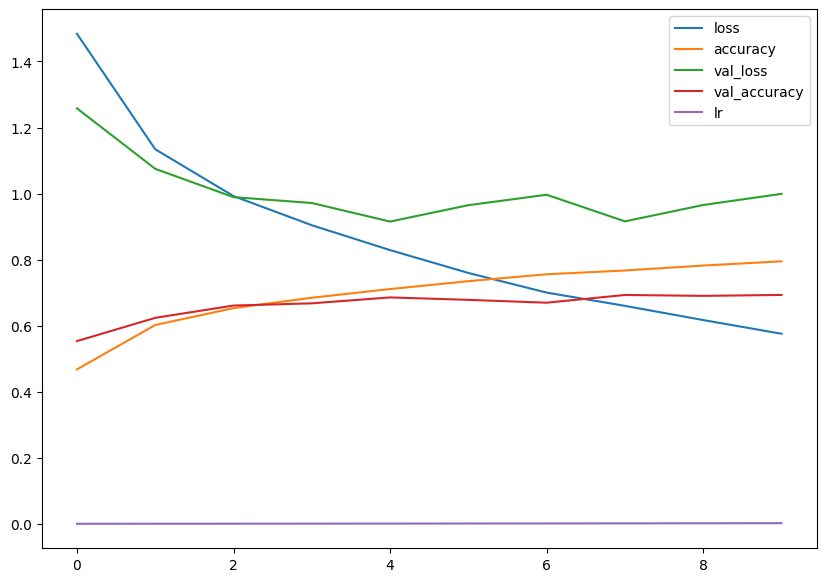

In [29]:
pd.DataFrame(history_2.history).plot(figsize=(10,7))
plt.legend()

In [30]:
model_2.evaluate(X_test_norm, tf.cast(y_test,dtype=tf.int16))

313/313 [==============================] - 1s 3ms/step - loss: 0.9992 - accuracy: 0.6934


[0.9992110133171082, 0.6934000253677368]

Accuracy increased by 0.0024

#### Using regularisation


In [31]:
# set random seed
tf.random.set_seed(42)

# create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3), strides=1, kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-1,l2=1e-1), activation="relu", input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3), strides=1,activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(len(class_names), activation="softmax"),
])


In [32]:
# comile the model
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0028),
              metrics="accuracy")

In [33]:
# fit the model on the training data
history_3 = model_3.fit(X_train_norm,
                    tf.cast(y_train, dtype=tf.int16),
                    epochs=5,
                    callbacks=[tensorboard_callbacks],
                    validation_data=[X_test_norm, y_test],
                    batch_size=64)

Epoch 1/5
782/782 [==============================] - 6s 6ms/step - loss: 2.0674 - accuracy: 0.3558 - val_loss: 1.7008 - val_accuracy: 0.4276
Epoch 2/5
782/782 [==============================] - 4s 5ms/step - loss: 1.6400 - accuracy: 0.4552 - val_loss: 1.6336 - val_accuracy: 0.4587
Epoch 3/5
782/782 [==============================] - 5s 6ms/step - loss: 1.5229 - accuracy: 0.5033 - val_loss: 1.4981 - val_accuracy: 0.5043
Epoch 4/5
782/782 [==============================] - 4s 5ms/step - loss: 1.4401 - accuracy: 0.5343 - val_loss: 1.5155 - val_accuracy: 0.5006
Epoch 5/5
782/782 [==============================] - 4s 5ms/step - loss: 1.3853 - accuracy: 0.5554 - val_loss: 1.4053 - val_accuracy: 0.5437


In [34]:
# evaluate the peroformance
model_3.evaluate(X_test_norm, tf.cast(y_test,dtype=tf.int16))

313/313 [==============================] - 1s 3ms/step - loss: 1.4053 - accuracy: 0.5437


[1.4053308963775635, 0.5436999797821045]

Adding more conv2d and maxpooling layers

In [35]:
# set random seed
tf.random.set_seed(42)

# create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3), strides=1, activation="relu", input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3), strides=1, activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3), strides=1, activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(len(class_names), activation="softmax"),
])


# comile the model
model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0028),
              metrics=["accuracy"])

# fit the model on the training data
history_4 = model_4.fit(X_train_norm,
                    tf.cast(y_train, dtype=tf.int16),
                    epochs=10,
                    callbacks=[tensorboard_callbacks],
                    validation_data=[X_test_norm, y_test],
                    batch_size=64)

Epoch 1/10
782/782 [==============================] - 11s 11ms/step - loss: 1.5361 - accuracy: 0.4368 - val_loss: 1.2993 - val_accuracy: 0.5343
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 1.1644 - accuracy: 0.5859 - val_loss: 1.1027 - val_accuracy: 0.6039
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 1.0181 - accuracy: 0.6411 - val_loss: 1.0053 - val_accuracy: 0.6402
Epoch 4/10
782/782 [==============================] - 4s 6ms/step - loss: 0.9320 - accuracy: 0.6716 - val_loss: 1.0079 - val_accuracy: 0.6426
Epoch 5/10
782/782 [==============================] - 5s 7ms/step - loss: 0.8619 - accuracy: 0.6965 - val_loss: 0.9198 - val_accuracy: 0.6788
Epoch 6/10
782/782 [==============================] - 4s 6ms/step - loss: 0.8145 - accuracy: 0.7143 - val_loss: 0.9513 - val_accuracy: 0.6703
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 0.7640 - accuracy: 0.7304 - val_loss: 0.9640 - val_accuracy: 0.6773
Epoc

In [36]:
# model_4.evaluate(X_test_norm, tf.cast(y_test,dtype=tf.int16))

Add more conv2d layers repeating at every step

In [37]:
# set random seed
tf.random.set_seed(42)

# create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3), strides=1, activation="relu", input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3), strides=1, activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3), strides=1, activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(len(class_names), activation="softmax"),
])

# comile the model
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0028),
              metrics="accuracy")

# fit the model on the training data
history_5 = model_5.fit(X_train_norm,
                    tf.cast(y_train, dtype=tf.int16),
                    epochs=10,
                    callbacks=[tensorboard_callbacks],
                    validation_data=[X_test_norm, y_test],
                    batch_size=64)

Epoch 1/10
782/782 [==============================] - 8s 7ms/step - loss: 1.6769 - accuracy: 0.3775 - val_loss: 1.5225 - val_accuracy: 0.4549
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 1.3980 - accuracy: 0.4934 - val_loss: 1.2481 - val_accuracy: 0.5528
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 1.2928 - accuracy: 0.5358 - val_loss: 1.2544 - val_accuracy: 0.5575
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 1.2306 - accuracy: 0.5624 - val_loss: 1.1253 - val_accuracy: 0.6098
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 1.2023 - accuracy: 0.5737 - val_loss: 1.0864 - val_accuracy: 0.6186
Epoch 6/10
782/782 [==============================] - 4s 6ms/step - loss: 1.1702 - accuracy: 0.5856 - val_loss: 1.1512 - val_accuracy: 0.5978
Epoch 7/10
782/782 [==============================] - 4s 6ms/step - loss: 1.1394 - accuracy: 0.5966 - val_loss: 1.4028 - val_accuracy: 0.5235
Epoch 

In [38]:
model_5.evaluate(X_test_norm, tf.cast(y_test,dtype=tf.int16))

313/313 [==============================] - 1s 3ms/step - loss: 1.0356 - accuracy: 0.6391


[1.0356444120407104, 0.6391000151634216]

In [39]:
# set random seed
tf.random.set_seed(42)

# create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3), strides=1, activation="relu", input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3), strides=1, activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3), strides=1, activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(len(class_names), activation="softmax"),
])

# comile the model
model_6.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics="accuracy")

# fit the model on the training data
history_6 = model_6.fit(X_train_norm,
                    tf.cast(y_train, dtype=tf.int16),
                    epochs=20,
                    callbacks=[tensorboard_callbacks],
                    validation_data=[X_test_norm, y_test],
                    batch_size=64)

Epoch 1/20
782/782 [==============================] - 7s 7ms/step - loss: 1.6400 - accuracy: 0.3980 - val_loss: 1.3446 - val_accuracy: 0.5278
Epoch 2/20
782/782 [==============================] - 5s 6ms/step - loss: 1.3035 - accuracy: 0.5341 - val_loss: 1.1447 - val_accuracy: 0.5943
Epoch 3/20
782/782 [==============================] - 4s 6ms/step - loss: 1.1785 - accuracy: 0.5786 - val_loss: 1.0679 - val_accuracy: 0.6288
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 1.0907 - accuracy: 0.6128 - val_loss: 1.0311 - val_accuracy: 0.6492
Epoch 5/20
782/782 [==============================] - 5s 6ms/step - loss: 1.0276 - accuracy: 0.6363 - val_loss: 0.9040 - val_accuracy: 0.6871
Epoch 6/20
782/782 [==============================] - 5s 6ms/step - loss: 0.9886 - accuracy: 0.6511 - val_loss: 0.9501 - val_accuracy: 0.6680
Epoch 7/20
782/782 [==============================] - 5s 6ms/step - loss: 0.9495 - accuracy: 0.6635 - val_loss: 0.8787 - val_accuracy: 0.6872
Epoch 

In [40]:
model_6.evaluate(X_test_norm, tf.cast(y_test,dtype=tf.int16))

313/313 [==============================] - 1s 4ms/step - loss: 0.7052 - accuracy: 0.7573


[0.7051948308944702, 0.7573000192642212]

In [41]:
# kernel_initializer='he_uniform', padding='same'

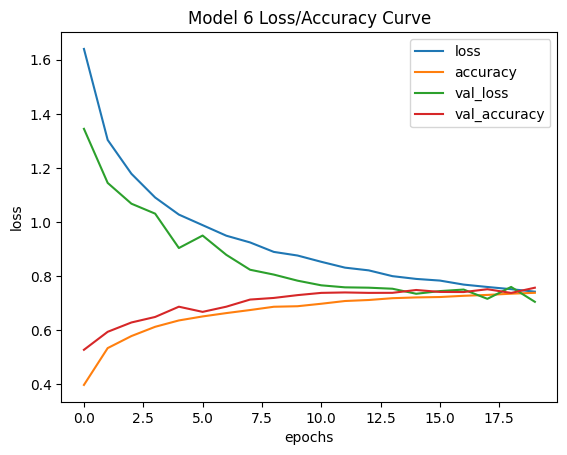

In [42]:
pd.DataFrame(history_6.history).plot()
plt.title("Model 6 Loss/Accuracy Curve")
plt.ylabel("loss")
plt.xlabel('epochs')
plt.legend();

In [43]:
# prettify the confusion matrix (sklearns plot confusion matrix)
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix_prettier(y_true, y_preds, figsize=(10,10), classes = None, text_size=10):

  """
  A function to plot the confusion matrix is a more
  visually understandable manner inspred by the plot_confusion_matrix function offered by sklearn
   """

  # create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # lets prettify the plotting
  fig, ax = plt.subplots(figsize=figsize)
  # cerate matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # label the axes
  ax.set(title="Confusion martix",
        xlabel="Perdicted labels",
        ylabel="Actual Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # set x_axis labels to the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # adjust ylabel size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # set the threshold
  threshold = (cm.max()+cm.min()) / 2

  # plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)


In [44]:
y_probs=model_6.predict(X_test_norm)
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[8.7154340e-03, 8.2906075e-03, 2.7647089e-02, 4.5278481e-01,
        3.5036325e-03, 1.0618887e-01, 4.4521630e-02, 9.8179523e-03,
        3.2562548e-01, 1.2904528e-02],
       [9.1447318e-03, 1.5266605e-01, 3.6124607e-06, 4.7465751e-06,
        1.7107235e-06, 7.7831317e-08, 2.7949243e-06, 1.9326192e-06,
        8.3679193e-01, 1.3823938e-03],
       [5.6357559e-02, 1.4985998e-01, 4.4690556e-04, 3.5848850e-03,
        6.7782332e-04, 1.3076272e-04, 1.1668117e-03, 8.6917564e-05,
        7.7165699e-01, 1.6031465e-02],
       [4.9992925e-01, 2.1986138e-02, 3.9394416e-02, 1.3824689e-02,
        5.2411474e-02, 2.5055985e-04, 8.3163712e-04, 1.5805634e-03,
        3.6806479e-01, 1.7265067e-03],
       [4.1020780e-06, 1.3770078e-05, 4.3613512e-02, 2.0548133e-02,
        4.5904139e-01, 6.8966020e-04, 4.7605029e-01, 7.7260520e-06,
        1.9858093e-05, 1.1537976e-05]], dtype=float32)

In [45]:
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

In [46]:
y_test_label = np.array(y_test).argmax(axis=1)
y_test_label[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

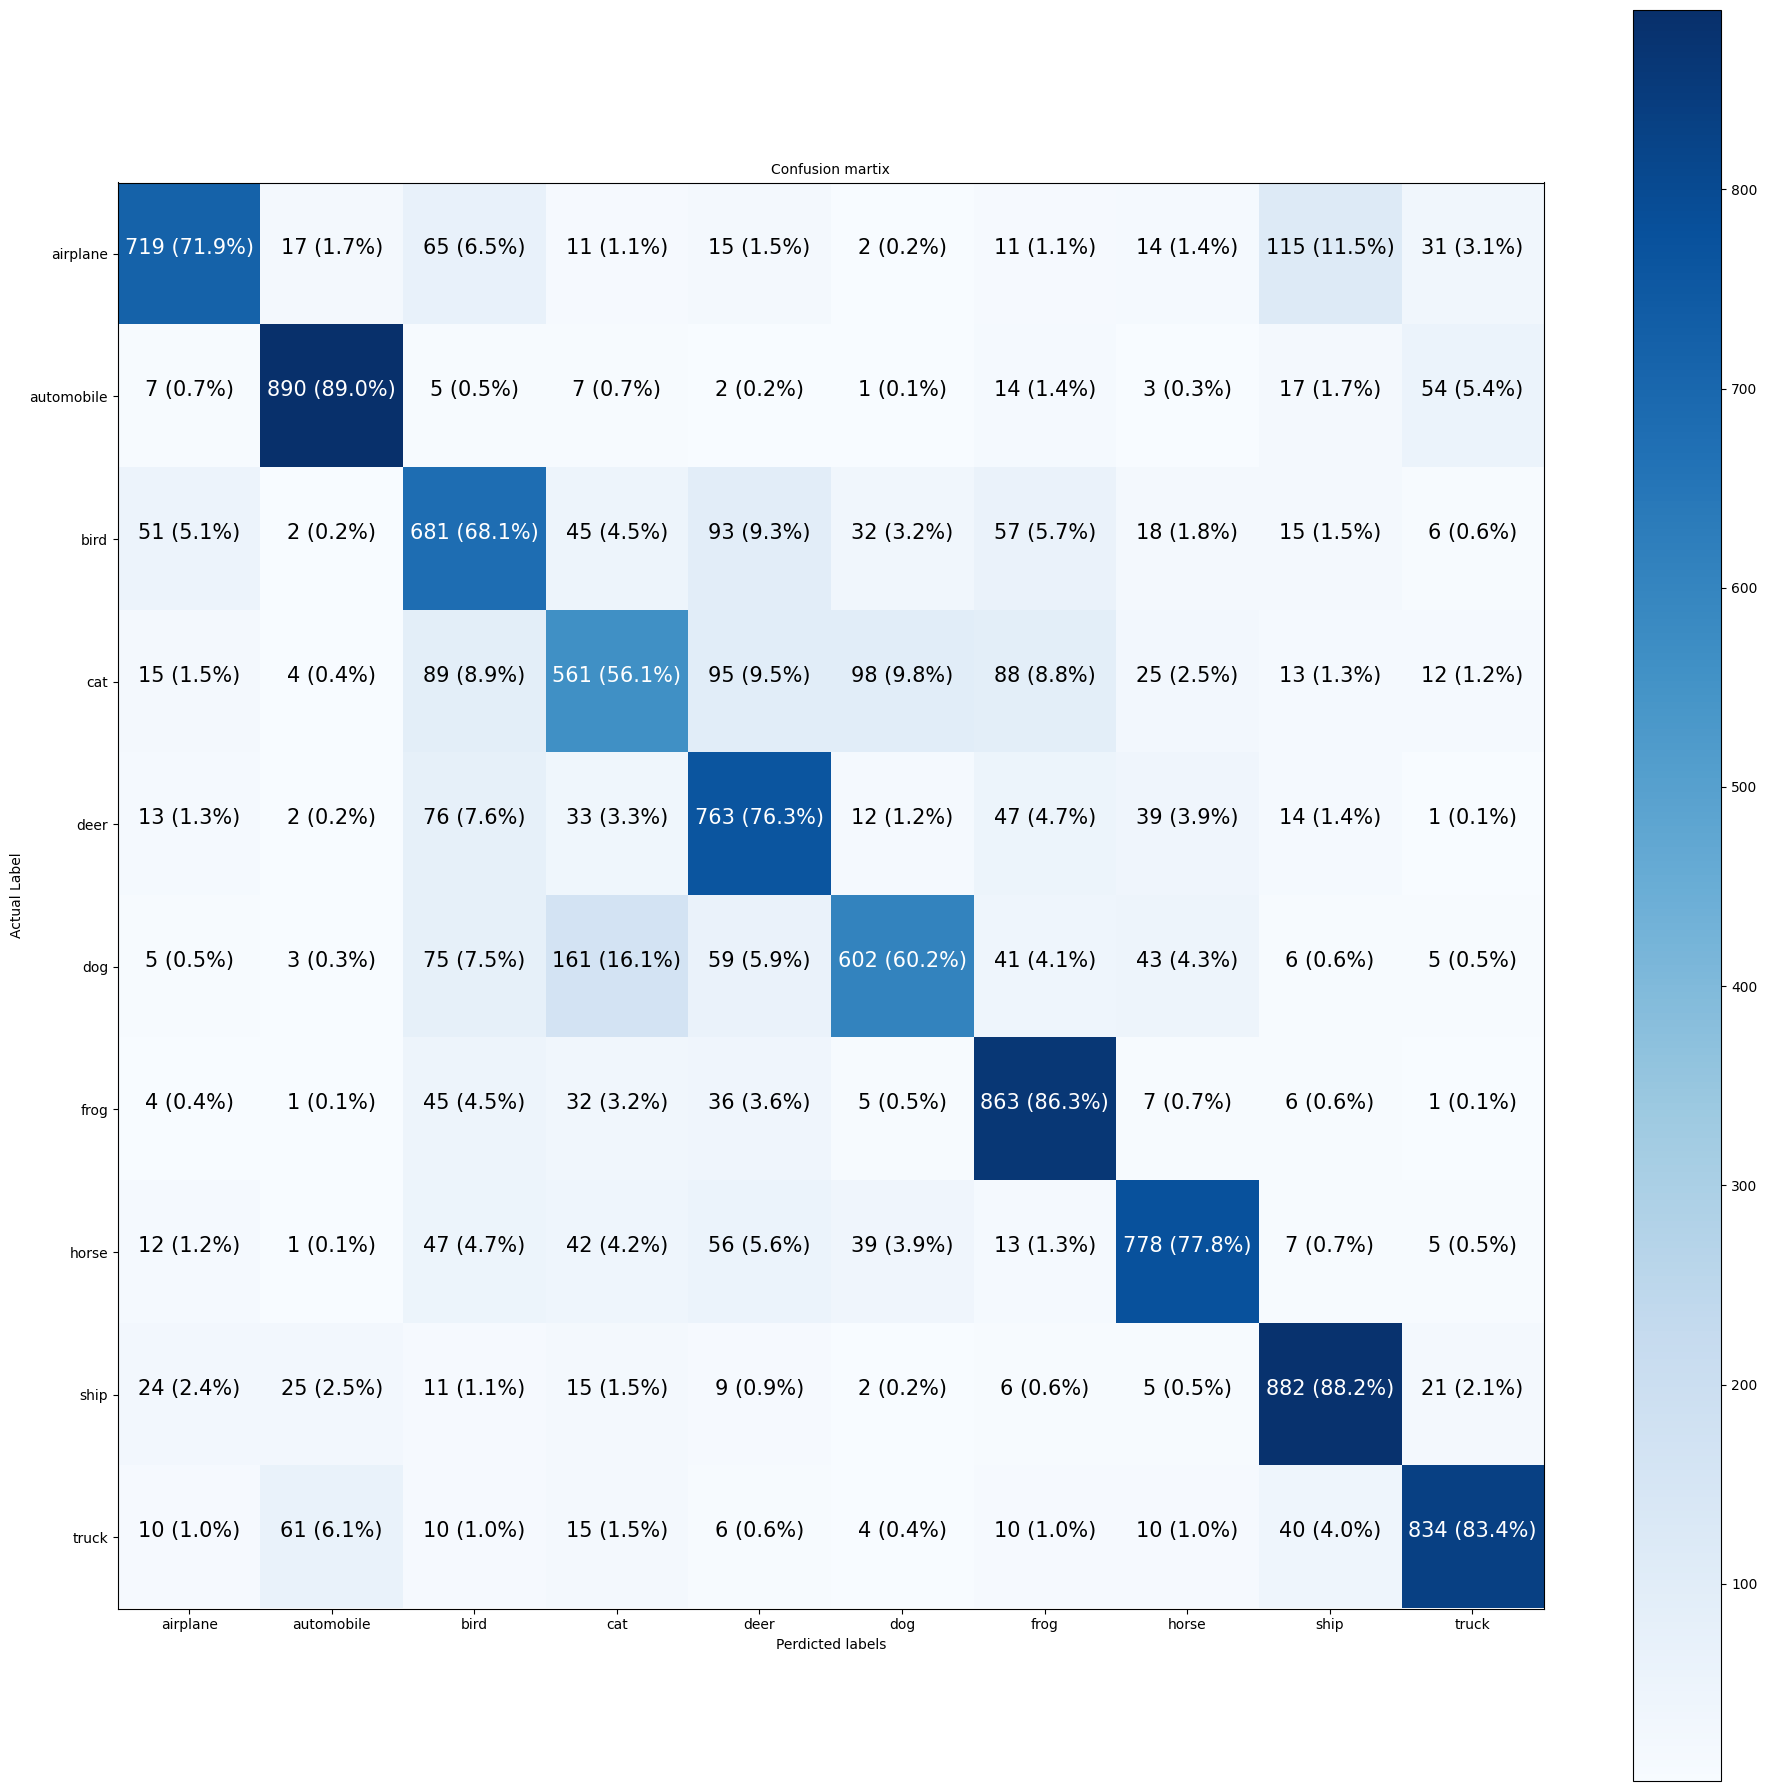

In [49]:
plot_confusion_matrix_prettier(y_true=y_test_label, y_preds=y_preds, classes=class_names, figsize=(23,23) )